In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from ipywidgets import interactive
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.float_format', lambda x: '%.2f' %x)

# Read CSV & Clean Timestamps

In [2]:
etsy = pd.read_csv("../data/paper_listings.csv")
etsy.head()

,Unnamed: 0,listing_id,user_id,shop_id,title,description,state,creation_timestamp,created_timestamp,ending_timestamp,original_creation_timestamp,last_modified_timestamp,updated_timestamp,state_timestamp,quantity,shop_section_id,featured_rank,url,num_favorers,non_taxable,is_taxable,is_customizable,is_personalizable,personalization_is_required,personalization_char_count_max,personalization_instructions,listing_type,tags,materials,shipping_profile_id,processing_min,processing_max,who_made,when_made,is_supply,item_weight,item_weight_unit,item_length,item_width,item_height,item_dimensions_unit,is_private,style,file_data,has_variations,should_auto_renew,language,taxonomy_id,production_partners,skus,price.amount,price.divisor,price.currency_code
0,0,236796647,7891149,5627890,Birthday Card - Happy Birthday - Handwritten -...,"Wish your friends, relatives, neighbors, co-wo...",active,1603949423,1603949423,1614493823,1434166182,1616371616,1616371616,1500703763,10,13518016.0,-1,https://www.etsy.com/listing/236796647/birthda...,21,False,True,False,False,False,NaN,NaN,physical,"['Birthday Card', 'Happy Birthday', 'Handwritt...","['paper', 'envelope', 'hand lettered calligrap...",1.349964e+10,3.0,5.0,i_did,2010_2019,False,3.0,oz,9.0,6.0,1.0,in,False,[],NaN,False,True,en-US,1264,[],[],250,100,USD
1,1,618131165,14823706,6579872,"Thinking Of You, hand lettered sympathy card w...","Our Thinking Of You, hand lettered luxury gree...",active,1603950621,1603950621,1614495021,1527831961,1653654206,1653654206,1527831961,50,24820281.0,-1,https://www.etsy.com/listing/618131165/thinkin...,3,False,True,False,False,False,NaN,NaN,physical,"['hand lettered', 'grief and mourning', 'greet...","['matte card', 'grey luxury envelope']",5.707607e+10,1.0,2.0,i_did,made_to_order,False,NaN,NaN,NaN,NaN,NaN,NaN,False,[],NaN,False,False,en-US,1285,[],[],550,100,GBP
2,2,647582777,14823706,6579872,"You&#39;ve Got This, hand lettered congratulat...","Our You&#39;ve Got This, hand lettered luxury ...",active,1603968629,1603968629,1614513029,1538321769,1625501758,1625501758,1538321770,50,24820281.0,-1,https://www.etsy.com/listing/647582777/youve-g...,11,False,True,False,False,False,NaN,NaN,physical,"['congrats card', 'congratulations', 'engageme...","['matte card', 'kraft envelope']",6.147621e+10,1.0,2.0,i_did,made_to_order,False,NaN,NaN,NaN,NaN,NaN,NaN,False,[],NaN,False,True,en-US,1270,[],[],550,100,GBP
3,3,717730423,43040627,9039454,Custom Name Wooden Plank Laser Cut Sign - Lett...,| ITEM DETAILS |\nCustom Wooden Name Plank\nPi...,active,1603984866,1603984866,1614529266,1561803169,1644342352,1644342352,1561803169,8,21290861.0,-1,https://www.etsy.com/listing/717730423/custom-...,12,False,True,True,True,True,256.0,Please let us know the last name you would lik...,physical,"['custom name sign', 'house warming gift', 'la...","['mdf wood', 'paint', 'glue', 'stained wood pl...",7.529834e+10,15.0,20.0,i_did,made_to_order,False,64.0,oz,18.0,16.0,4.0,in,False,[],NaN,True,True,en-US,1334,[],[],7500,100,USD
4,4,815329154,6027215,5325270,"Cake Topper, Personalised Hand Lettered Handma...",P E R S O N A L I S E D \nC A K E \nT O P P E ...,active,1603997481,1603997481,1614541881,1593023750,1652433117,1652433117,1593025692,8,29312008.0,-1,https://www.etsy.com/listing/815329154/cake-to...,1,False,True,True,True,True,256.0,Please write your message here,physical,"['cake topper', 'cake topper birthday', 'birth...",['Paper'],9.898261e+10,3.0,5.0,i_did,made_to_order,False,NaN,NaN,NaN,NaN,NaN,NaN,False,[],NaN,True,True,en-US,9122,[],[],1350,100,GBP


In [3]:
etsy.shape

(40300, 53)

In [4]:
etsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40300 entries, 0 to 40299
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      40300 non-null  int64  
 1   listing_id                      40300 non-null  int64  
 2   user_id                         40300 non-null  int64  
 3   shop_id                         40300 non-null  int64  
 4   title                           40300 non-null  object 
 5   description                     40300 non-null  object 
 6   state                           40300 non-null  object 
 7   creation_timestamp              40300 non-null  int64  
 8   created_timestamp               40300 non-null  int64  
 9   ending_timestamp                40300 non-null  int64  
 10  original_creation_timestamp     40300 non-null  int64  
 11  last_modified_timestamp         40300 non-null  int64  
 12  updated_timestamp               

In [5]:
etsy['creation_timestamp'] = pd.to_datetime(etsy['creation_timestamp'], unit='s')
etsy.head(3)

,Unnamed: 0,listing_id,user_id,shop_id,title,description,state,creation_timestamp,created_timestamp,ending_timestamp,original_creation_timestamp,last_modified_timestamp,updated_timestamp,state_timestamp,quantity,shop_section_id,featured_rank,url,num_favorers,non_taxable,is_taxable,is_customizable,is_personalizable,personalization_is_required,personalization_char_count_max,personalization_instructions,listing_type,tags,materials,shipping_profile_id,processing_min,processing_max,who_made,when_made,is_supply,item_weight,item_weight_unit,item_length,item_width,item_height,item_dimensions_unit,is_private,style,file_data,has_variations,should_auto_renew,language,taxonomy_id,production_partners,skus,price.amount,price.divisor,price.currency_code
0,0,236796647,7891149,5627890,Birthday Card - Happy Birthday - Handwritten -...,"Wish your friends, relatives, neighbors, co-wo...",active,2020-10-29 05:30:23,1603949423,1614493823,1434166182,1616371616,1616371616,1500703763,10,13518016.0,-1,https://www.etsy.com/listing/236796647/birthda...,21,False,True,False,False,False,NaN,NaN,physical,"['Birthday Card', 'Happy Birthday', 'Handwritt...","['paper', 'envelope', 'hand lettered calligrap...",1.349964e+10,3.0,5.0,i_did,2010_2019,False,3.0,oz,9.0,6.0,1.0,in,False,[],NaN,False,True,en-US,1264,[],[],250,100,USD
1,1,618131165,14823706,6579872,"Thinking Of You, hand lettered sympathy card w...","Our Thinking Of You, hand lettered luxury gree...",active,2020-10-29 05:50:21,1603950621,1614495021,1527831961,1653654206,1653654206,1527831961,50,24820281.0,-1,https://www.etsy.com/listing/618131165/thinkin...,3,False,True,False,False,False,NaN,NaN,physical,"['hand lettered', 'grief and mourning', 'greet...","['matte card', 'grey luxury envelope']",5.707607e+10,1.0,2.0,i_did,made_to_order,False,NaN,NaN,NaN,NaN,NaN,NaN,False,[],NaN,False,False,en-US,1285,[],[],550,100,GBP
2,2,647582777,14823706,6579872,"You&#39;ve Got This, hand lettered congratulat...","Our You&#39;ve Got This, hand lettered luxury ...",active,2020-10-29 10:50:29,1603968629,1614513029,1538321769,1625501758,1625501758,1538321770,50,24820281.0,-1,https://www.etsy.com/listing/647582777/youve-g...,11,False,True,False,False,False,NaN,NaN,physical,"['congrats card', 'congratulations', 'engageme...","['matte card', 'kraft envelope']",6.147621e+10,1.0,2.0,i_did,made_to_order,False,NaN,NaN,NaN,NaN,NaN,NaN,False,[],NaN,False,True,en-US,1270,[],[],550,100,GBP


In [6]:
etsy['created_timestamp'] = pd.to_datetime(etsy['created_timestamp'], unit='s')

In [7]:
etsy['ending_timestamp'] = pd.to_datetime(etsy['ending_timestamp'], unit='s')

In [8]:
etsy['original_creation_timestamp'] = pd.to_datetime(etsy['original_creation_timestamp'], unit='s')

In [9]:
etsy['last_modified_timestamp'] = pd.to_datetime(etsy['last_modified_timestamp'], unit='s')

In [10]:
etsy['updated_timestamp'] = pd.to_datetime(etsy['updated_timestamp'], unit='s')

In [11]:
etsy['state_timestamp'] = pd.to_datetime(etsy['state_timestamp'], unit='s')
etsy.head()

,Unnamed: 0,listing_id,user_id,shop_id,title,description,state,creation_timestamp,created_timestamp,ending_timestamp,original_creation_timestamp,last_modified_timestamp,updated_timestamp,state_timestamp,quantity,shop_section_id,featured_rank,url,num_favorers,non_taxable,is_taxable,is_customizable,is_personalizable,personalization_is_required,personalization_char_count_max,personalization_instructions,listing_type,tags,materials,shipping_profile_id,processing_min,processing_max,who_made,when_made,is_supply,item_weight,item_weight_unit,item_length,item_width,item_height,item_dimensions_unit,is_private,style,file_data,has_variations,should_auto_renew,language,taxonomy_id,production_partners,skus,price.amount,price.divisor,price.currency_code
0,0,236796647,7891149,5627890,Birthday Card - Happy Birthday - Handwritten -...,"Wish your friends, relatives, neighbors, co-wo...",active,2020-10-29 05:30:23,2020-10-29 05:30:23,2021-02-28 06:30:23,2015-06-13 03:29:42,2021-03-22 00:06:56,2021-03-22 00:06:56,2017-07-22 06:09:23,10,13518016.0,-1,https://www.etsy.com/listing/236796647/birthda...,21,False,True,False,False,False,NaN,NaN,physical,"['Birthday Card', 'Happy Birthday', 'Handwritt...","['paper', 'envelope', 'hand lettered calligrap...",1.349964e+10,3.0,5.0,i_did,2010_2019,False,3.0,oz,9.0,6.0,1.0,in,False,[],NaN,False,True,en-US,1264,[],[],250,100,USD
1,1,618131165,14823706,6579872,"Thinking Of You, hand lettered sympathy card w...","Our Thinking Of You, hand lettered luxury gree...",active,2020-10-29 05:50:21,2020-10-29 05:50:21,2021-02-28 06:50:21,2018-06-01 05:46:01,2022-05-27 12:23:26,2022-05-27 12:23:26,2018-06-01 05:46:01,50,24820281.0,-1,https://www.etsy.com/listing/618131165/thinkin...,3,False,True,False,False,False,NaN,NaN,physical,"['hand lettered', 'grief and mourning', 'greet...","['matte card', 'grey luxury envelope']",5.707607e+10,1.0,2.0,i_did,made_to_order,False,NaN,NaN,NaN,NaN,NaN,NaN,False,[],NaN,False,False,en-US,1285,[],[],550,100,GBP
2,2,647582777,14823706,6579872,"You&#39;ve Got This, hand lettered congratulat...","Our You&#39;ve Got This, hand lettered luxury ...",active,2020-10-29 10:50:29,2020-10-29 10:50:29,2021-02-28 11:50:29,2018-09-30 15:36:09,2021-07-05 16:15:58,2021-07-05 16:15:58,2018-09-30 15:36:10,50,24820281.0,-1,https://www.etsy.com/listing/647582777/youve-g...,11,False,True,False,False,False,NaN,NaN,physical,"['congrats card', 'congratulations', 'engageme...","['matte card', 'kraft envelope']",6.147621e+10,1.0,2.0,i_did,made_to_order,False,NaN,NaN,NaN,NaN,NaN,NaN,False,[],NaN,False,True,en-US,1270,[],[],550,100,GBP
3,3,717730423,43040627,9039454,Custom Name Wooden Plank Laser Cut Sign - Lett...,| ITEM DETAILS |\nCustom Wooden Name Plank\nPi...,active,2020-10-29 15:21:06,2020-10-29 15:21:06,2021-02-28 16:21:06,2019-06-29 10:12:49,2022-02-08 17:45:52,2022-02-08 17:45:52,2019-06-29 10:12:49,8,21290861.0,-1,https://www.etsy.com/listing/717730423/custom-...,12,False,True,True,True,True,256.0,Please let us know the last name you would lik...,physical,"['custom name sign', 'house warming gift', 'la...","['mdf wood', 'paint', 'glue', 'stained wood pl...",7.529834e+10,15.0,20.0,i_did,made_to_order,False,64.0,oz,18.0,16.0,4.0,in,False,[],NaN,True,True,en-US,1334,[],[],7500,100,USD
4,4,815329154,6027215,5325270,"Cake Topper, Personalised Hand Lettered Handma...",P E R S O N A L I S E D \nC A K E \nT O P P E ...,active,2020-10-29 18:51:21,2020-10-29 18:51:21,2021-02-28 19:51:21,2020-06-24 18:35:50,2022-05-13 09:11:57,2022-05-13 09:11:57,2020-06-24 19:08:12,8,29312008.0,-1,https://www.etsy.com/listing/815329154/cake-to...,1,False,True,True,True,True,256.0,Please write your message here,physical,"['cake topper', 'cake topper birthday', 'birth...",['Paper'],9.898261e+10,3.0,5.0,i_did,made_to_order,False,NaN,NaN,NaN,NaN,NaN,NaN,False,[],NaN,True,True,en-US,9122,[],[],1350,100,GBP


# Value Counts & EDA

In [12]:
etsy['user_id'].value_counts(normalize=True)*100

16852325     3.364764
193982286    2.481390
63196199     1.518610
32913891     1.339950
50346675     1.305211
23654923     1.238213
14888894     1.057072
14823706     0.972705
25259704     0.870968
543746238    0.759305
185301665    0.707196
12009177     0.702233
27865365     0.687345
7763678      0.677419
28227169     0.655087
193296888    0.602978
5972028      0.585608
144178842    0.558313
217342083    0.535980
43040627     0.533499
91572771     0.521092
9731901      0.518610
10511731     0.516129
44787026     0.513648
28779881     0.496278
86964272     0.473945
12416503     0.451613
316124173    0.424318
213707521    0.409429
27043801     0.397022
72294158     0.392060
10618417     0.372208
38771419     0.364764
10200847     0.364764
25757141     0.354839
81288839     0.339950
5636684      0.334988
71200323     0.332506
117921724    0.330025
39273894     0.317618
218894640    0.315136
328828440    0.315136
88227714     0.312655
7678050      0.310174
103249634    0.305211
55262148  

In [13]:
etsy['shop_id'].value_counts(normalize=True)*100

9440250     3.364764
19242740    2.481390
10857427    1.518610
8083305     1.339950
10492679    1.305211
7148172     1.238213
6346315     1.057072
6579872     0.972705
7337045     0.870968
32414043    0.759305
18912221    0.707196
6425106     0.702233
10154734    0.687345
5642079     0.677419
8012492     0.655087
19215931    0.602978
5315181     0.585608
17321049    0.558313
20055187    0.535980
9039454     0.533499
13071512    0.521092
9924934     0.518610
5955193     0.516129
9201026     0.513648
23070636    0.496278
13024082    0.473945
24129721    0.451613
23499867    0.424318
19909567    0.409429
9196251     0.397022
11642246    0.392060
8117254     0.372208
8799636     0.364764
16409549    0.364764
9037404     0.354839
15682690    0.339950
8309651     0.334988
11550940    0.332506
15832452    0.330025
9549596     0.317618
20272012    0.315136
24433357    0.315136
13156236    0.312655
5595626     0.310174
14579640    0.305211
10187277    0.295285
11265791    0.295285
23462546    0

In [14]:
etsy.groupby('shop_id')['listing_id'].value_counts()

shop_id   listing_id
5025371   1092562530    4
5116051   618930077     4
          632191815     4
          648015358     4
          650840118     4
          919553023     4
          544181641     3
          553655602     3
          610647174     3
          619144113     3
          621693407     3
          665756906     3
          705656691     3
          1032046109    3
5118278   1094635746    5
5129500   495766830     3
5147375   989533750     4
          989534926     4
          1003496145    4
          989538018     3
          1003493757    3
          1003495449    3
          1003496725    3
5151597   1225547601    3
5155215   685402949     3
5155686   185390624     3
5157128   536236230     3
5157400   156154142     4
          156171300     3
5162302   1157341500    4
          684149188     3
5175721   1088868587    3
5183797   707290382     3
          721052389     3
5200097   728111794     4
5210177   103910204     4
          103913352     4
          1261700

In [15]:
etsy['state'].value_counts(normalize=True)*100

active    100.0
Name: state, dtype: float64

In [16]:
etsy.groupby('num_favorers')['shop_id'].value_counts()

num_favorers  shop_id 
0             32414043    303
              7337045     124
              20055187    117
              8012492     104
              24129721     96
              23499867     93
              19215931     85
              27539719     84
              6579872      78
              9924934      77
              10667743     72
              18775009     72
              24387034     69
              7770040      66
              20920777     66
              19085053     65
              13241372     62
              25867686     60
              28991833     57
              14079113     56
              22053295     56
              26187898     54
              23462546     51
              9201026      49
              23331069     49
              30942852     49
              7272584      48
              7890152      48
              9691199      48
              11265791     46
              30916789     45
              18910149     44
              906

In [17]:
etsy['is_taxable'].value_counts(normalize=True)*100

True     96.66005
False     3.33995
Name: is_taxable, dtype: float64

In [18]:
etsy.groupby('is_taxable')['price.currency_code'].value_counts()

is_taxable  price.currency_code
False       USD                     1029
            CAD                      188
            GBP                       84
            AUD                       31
            EUR                       14
True        USD                    28322
            GBP                     5976
            AUD                     1399
            CAD                     1145
            EUR                     1052
            NZD                      745
            DKK                      210
            SEK                       33
            HKD                       30
            SGD                       29
            VND                        7
            IDR                        3
            MYR                        3
Name: price.currency_code, dtype: int64

In [19]:
etsy['price.currency_code'].value_counts(normalize=True)*100

USD    72.831266
GBP    15.037221
AUD     3.548387
CAD     3.307692
EUR     2.645161
NZD     1.848635
DKK     0.521092
SEK     0.081886
HKD     0.074442
SGD     0.071960
VND     0.017370
IDR     0.007444
MYR     0.007444
Name: price.currency_code, dtype: float64

In [54]:
etsy['language'].value_counts(normalize=True)*100

en-US         99.776675
MACHINE_en     0.223325
Name: language, dtype: float64

In [57]:
taxon_count = etsy['taxonomy_id'].value_counts()#(normalize=True)*100
taxon_count

1326     4338
1261     3384
1265     2753
1264     2055
1317     2022
12394    1639
6121     1627
1273     1524
562      1361
1286     1023
1676     1019
6056      987
354       889
1267      835
1281      812
1875      678
1322      676
6617      572
1319      558
1327      525
1263      506
1272      504
1334      476
1310      471
1877      448
6365      416
1292      348
1266      333
1303      330
1312      312
2177      308
6598      306
1280      301
6852      252
1268      239
769       237
1250      232
1660      228
1671      221
1285      208
1279      190
1311      180
1262      168
2102      161
1675      156
9122      156
1672      149
1288      149
1315      121
2928      112
1677      112
1287      108
1283       99
1349       99
6343       95
1674       93
1251       93
1282       84
1331       80
1669       78
2855       75
1678       73
1657       68
1878       68
1269       67
1348       66
1318       65
6338       65
1278       62
1290       62
6599       61
1293  

In [64]:
tdf= pd.DataFrame(taxon_count)
#tdf= tdf.rename(columns={'index':'taxonomy_id', 'taxonomy_id': 'count'})
tdf = tdf.reset_index()

In [65]:
tdf

,index,taxonomy_id
0,1326,4338
1,1261,3384
2,1265,2753
3,1264,2055
4,1317,2022
5,12394,1639
6,6121,1627
7,1273,1524
8,562,1361
9,1286,1023


In [70]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   index        130 non-null    int64
 1   taxonomy_id  130 non-null    int64
dtypes: int64(2)
memory usage: 2.2 KB


In [66]:
%matplotlib inline

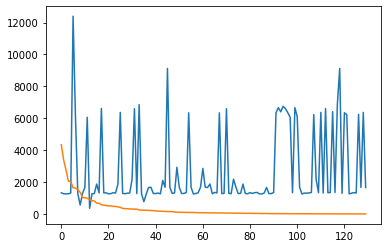

In [67]:
plt.plot(tdf)

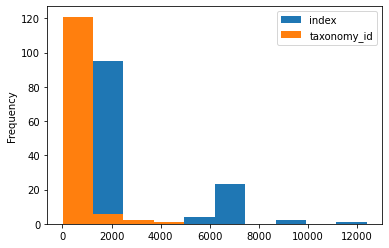

In [68]:
ax = tdf.plot.hist()